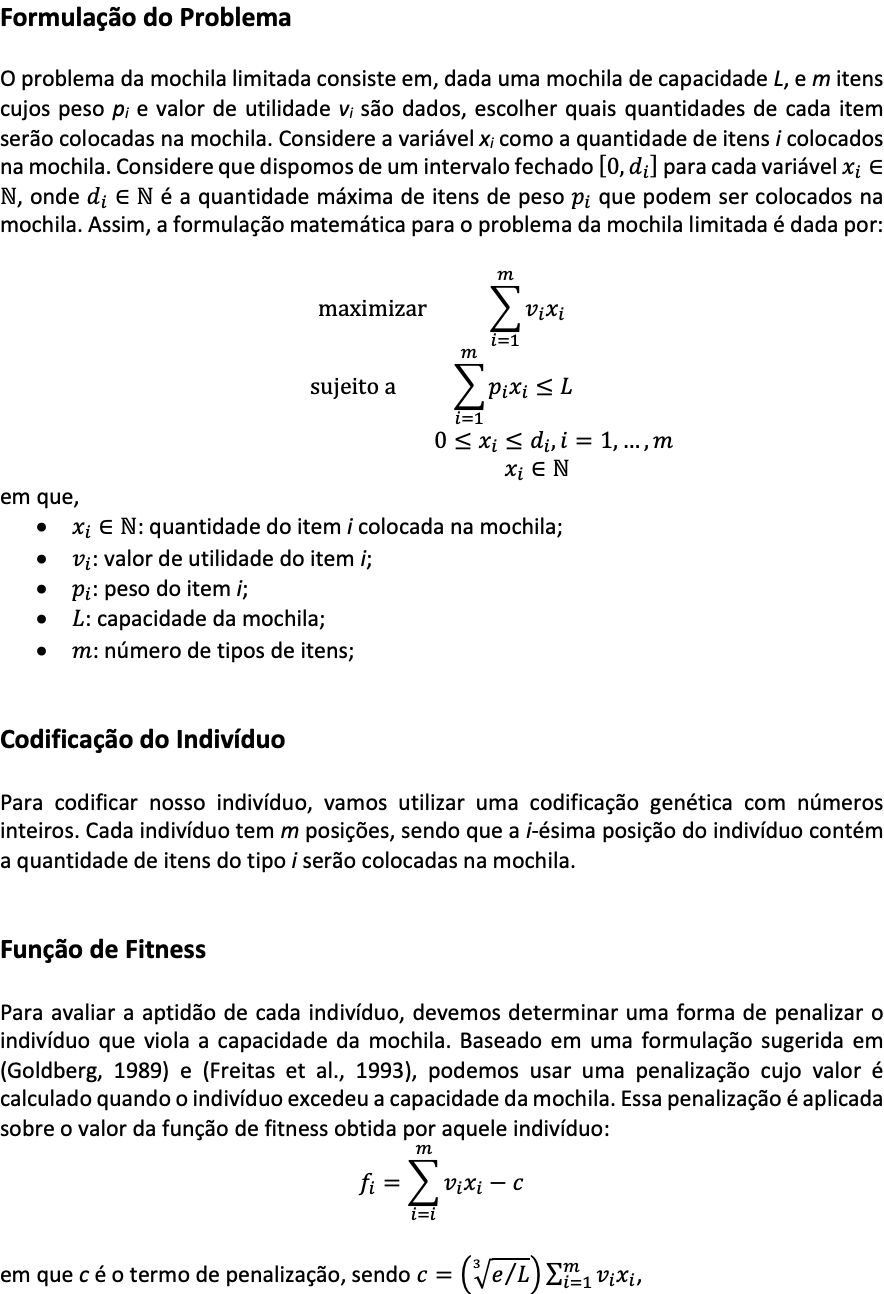

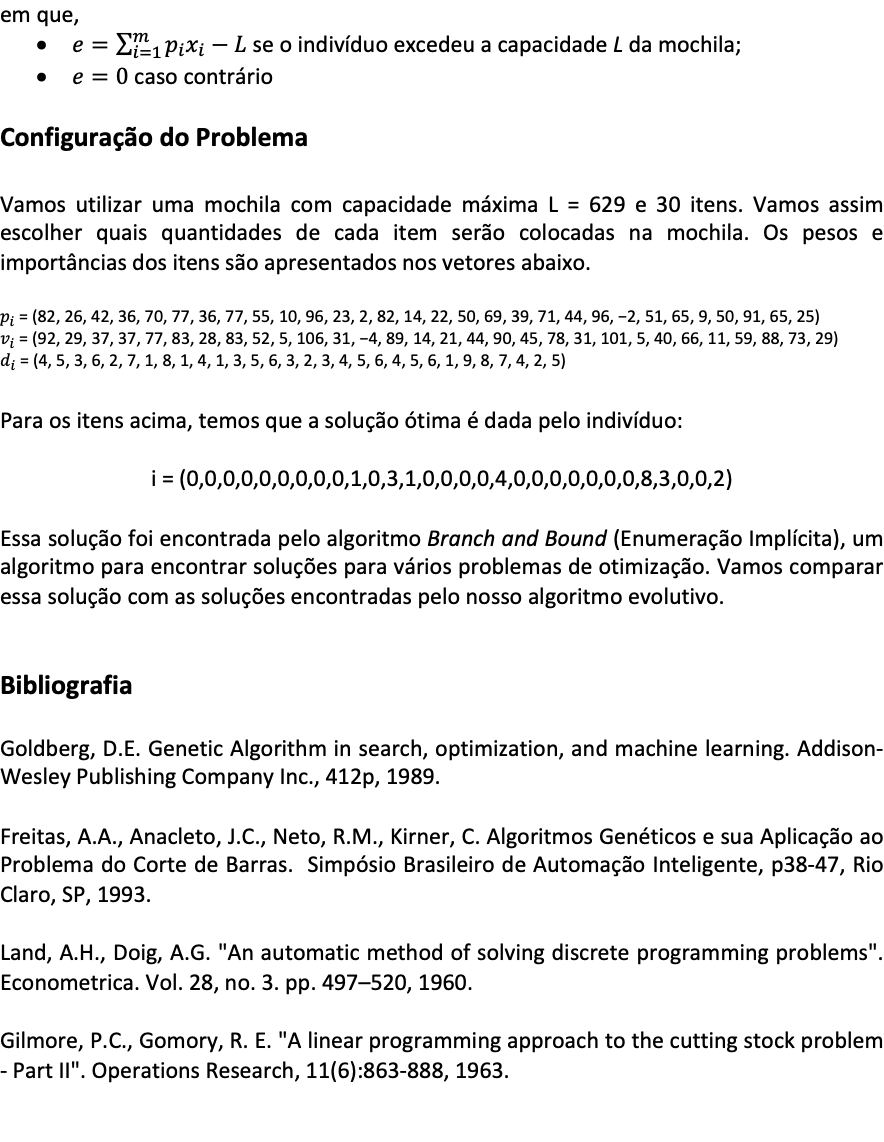

Importando bibliotecas

In [92]:
import numpy as np
import random
import matplotlib.pyplot as plt

Declarando pesos, utilidades, quantidades máximas e peso máximo da mochila

In [93]:
# Pesos
p = [82, 26, 42, 36, 70, 77, 36, 77, 55, 10, 96, 23, 2, 82, 14, 22, 50, 69, 39, 71, 44, 96, -2, 51, 65, 9, 50, 91, 65, 25]

# Utilidade
v = [92, 29, 37, 37, 77, 83, 28, 83, 52, 5, 106, 31, -4, 89, 14, 21, 44, 90, 45, 78, 31, 101, 5, 40, 66, 11, 59, 88, 73, 29]

# Quantidades máximas
d = [4, 5, 3, 6, 2, 7, 1, 8, 1, 4, 1, 3, 5, 6, 3, 2, 3, 4, 5, 6, 4, 5, 6, 1, 9, 8, 7, 4, 2, 5]

#TODO: Implementar Branch and Bound

# Indivíduo encontrado com Branch and Bound
otimo = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 8, 3, 0, 0, 2]

# Peso máximo (capacidade) da mochila
L = 629

Vamos fazer a inicialização dos nossos indvíduos

In [94]:
num_individuos = 10000
populacao_inicial = np.zeros((num_individuos,len(d)), dtype=int)

for i in range(num_individuos):
  for j in range(len(d)):
    populacao_inicial[i][j] = random.randint(0,d[j])

amostra = 5
print(f"{amostra} primeiros indivíduos da população inicial:")
for i in range(5):
  print(populacao_inicial[i])

5 primeiros indivíduos da população inicial:
[3 4 1 2 1 1 0 5 0 4 1 1 5 6 2 1 1 1 2 4 0 0 3 1 0 1 1 0 0 4]
[2 1 2 2 1 3 1 7 1 3 0 2 3 2 0 2 2 2 1 5 4 4 2 0 7 4 2 1 0 4]
[4 1 3 2 2 6 1 4 0 0 1 0 0 2 1 1 2 3 3 6 0 3 2 1 6 2 6 1 2 5]
[4 0 0 3 1 0 1 3 0 4 1 0 1 1 2 0 2 0 2 1 4 1 6 1 7 0 5 3 2 4]
[3 1 1 2 2 7 0 3 0 1 1 3 4 0 1 2 1 2 2 5 2 4 2 1 9 1 6 3 2 4]


Vamos definir nossa função de fitness.
A função vai receber toda a população e calcular os valores de fitness



In [95]:
def fitness(ind):

  f = 0 # fitness
  w = 0 # weigth (peso)
  c = 0 # penalização
  e = 0 # termo da penalizacao c

  for i in range(len(ind)):
    f = f + v[i]*ind[i]
    w = w + p[i]*ind[i]


  if w > L:
    e = w - L

  c = ((e/L)**(1/3))*f

  f = f - c

  return f


def retorna_fitness(populacao):

  fit = []

  for i in range(num_individuos):
    f = fitness(populacao[i])
    fit.append(f)

  return fit


In [96]:
print("Teste da função de fitness:")
print(fitness(populacao_inicial[0]))

Teste da função de fitness:
-1055.5948644254722


Seleção por torneio

In [97]:
def selecao_torneio(fitnesses):
  ind1 = -1
  ind2 = -1

  while ind1 == ind2:
    # Torneio 1
    sorteados = random.sample(range(0, num_individuos), 2)
    if fitnesses[sorteados[0]] > fitnesses[sorteados[1]]:
      ind1 = sorteados[0]
    else:
      ind1 = sorteados[1]

    # Torneio 2
    sorteados = random.sample(range(0, num_individuos), 2)
    if fitnesses[sorteados[0]] > fitnesses[sorteados[1]]:
      ind2 = sorteados[0]
    else:
      ind2 = sorteados[1]

  return ind1,ind2


Cruzamento (crossover) de 1 ponto

In [98]:
def cruzamento(ids,populacao):
  ponto = random.randint(1, len(d)-1)

  pai1 = populacao[ids[0]]
  pai2 = populacao[ids[1]]

  filho1 = np.concatenate([pai1[:ponto],pai2[ponto:]])
  filho2 = np.concatenate([pai2[:ponto],pai1[ponto:]])

  return filho1,filho2

Elitismo

In [99]:
def elitismo(fitnesses):

  id1 = fitnesses.index(max(fitnesses))

  fitnesses.pop(id1)
  id2 = fitnesses.index(max(fitnesses))

  return id1,id2

Mutação

In [100]:
def mutacao(filhos, taxa):

  for i in range(len(filhos)):
    if random.random() < taxa:
      pos = random.randint(0, len(d)-1)
      filhos[i][pos] = random.randint(0,d[pos])

  return filhos


Calcula peso

In [101]:
def calcula_peso(ind):
  w = 0
  for i in range(len(ind)):
    w = w + p[i]*ind[i]

  return w

Programa principal do Algoritmo Evolutivo

In [102]:
# Número de gerações
num_geracoes = 100

# Fitness e peso do indivíduo ótimo
fitness_otimo = fitness(otimo)
peso_otimo = calcula_peso(otimo)

fitness_melhores = []
pesos_melhores = []

fitness_gerais = []
momentos_mutacao = []

tx_mutacao = 0.05

for it in range(num_geracoes):

  # Nova populacao vazia
  nova_populacao = np.zeros((num_individuos,len(d)), dtype=int)

  # Calcula o fitness da população
  fit = retorna_fitness(populacao_inicial)
  fitness_gerais.append(sum(fit)/num_individuos)

  # Imprime o melhor individuo comparado com o ótimo
  id_melhor = fit.index(max(fit))
  peso_melhor = calcula_peso(populacao_inicial[id_melhor])
  
  print("Geração:",it+1)

  print("Melhor:",'  '.join(map(str,populacao_inicial[id_melhor])), '|',
        "Fit:",fit[id_melhor],'|',
        "Peso:",peso_melhor)
  
  # Guarda os fitness e pesos para plotar
  fitness_melhores.append(fit[id_melhor])
  pesos_melhores.append(peso_melhor)


  print("Ótimo:",'  '.join(map(str,otimo)),'|',
        "Fit:",fitness_otimo,'|',
        "Peso:",peso_otimo)
  print()

  # Elitismo
  elite = elitismo(fit.copy()) # Copiando por causa da referencia do vetor
  nova_populacao[0] = populacao_inicial[elite[0]]
  nova_populacao[1] = populacao_inicial[elite[1]]

  # Gera os filhos restantes para completar a população
  num_filhos = 2
  while num_filhos < num_individuos:

    # Seleção por torneio
    ind_vencedores = selecao_torneio(fit)

    # Cruzamento
    filhos = cruzamento(ind_vencedores,populacao_inicial)

    # CAplicacao variacao na taxa de mutacao
    if it > 10:
      if fitness_melhores[it] == fitness_melhores[it-1] and fitness_melhores[it-1] == fitness_melhores[it-2] and fitness_melhores[it-2] == fitness_melhores[it-3] and fitness_melhores[it-3] == fitness_melhores[it-4] and fitness_melhores[it-4] == fitness_melhores[it-5] and fitness_melhores[it-5] == fitness_melhores[it-6] and fitness_melhores[it-6] == fitness_melhores[it-7] and fitness_melhores[it-7] == fitness_melhores[it-8] and fitness_melhores[it-8] == fitness_melhores[it-9] and tx_mutacao == 0.05:
        tx_mutacao = 0.5
        momentos_mutacao.append(it)
      else:
        tx_mutacao = 0.05

    # Mutacao com taxa variável
    filhos = mutacao(filhos,tx_mutacao)

    # Coloca os filhos na nova população
    nova_populacao[num_filhos] = filhos[0]
    nova_populacao[num_filhos+1] = filhos[1]

    # Aumenta o número de filhod
    num_filhos = num_filhos + 2

  # Substitui a populacao antiga pela atual
  populacao_inicial = nova_populacao.copy()

Geração: 1
Melhor: 0  3  0  2  0  1  0  0  1  3  0  0  0  2  2  0  0  0  0  2  1  0  4  1  4  5  2  0  2  0 | Fit: -7.100816496299785 | Peso: 1268
Ótimo: 0  0  0  0  0  0  0  0  0  1  0  3  1  0  0  0  0  4  0  0  0  0  0  0  0  8  3  0  0  2 | Fit: 777.0 | Peso: 629

Geração: 2
Melhor: 0  4  1  0  1  2  0  1  0  1  1  0  4  1  1  0  1  0  0  0  2  0  0  0  1  8  1  1  0  0 | Fit: 118.82353435264531 | Peso: 1073
Ótimo: 0  0  0  0  0  0  0  0  0  1  0  3  1  0  0  0  0  4  0  0  0  0  0  0  0  8  3  0  0  2 | Fit: 777.0 | Peso: 629

Geração: 3
Melhor: 1  2  0  5  1  3  1  1  0  3  0  0  4  0  3  0  0  0  0  0  3  0  6  0  1  0  0  0  1  0 | Fit: 128.73956922125012 | Peso: 1058
Ótimo: 0  0  0  0  0  0  0  0  0  1  0  3  1  0  0  0  0  4  0  0  0  0  0  0  0  8  3  0  0  2 | Fit: 777.0 | Peso: 629

Geração: 4
Melhor: 0  4  1  1  0  0  1  1  1  3  0  0  2  0  1  1  0  0  5  0  0  0  5  0  0  6  3  0  0  4 | Fit: 237.39877640717896 | Peso: 909
Ótimo: 0  0  0  0  0  0  0  0  0  1  0  3  1  0

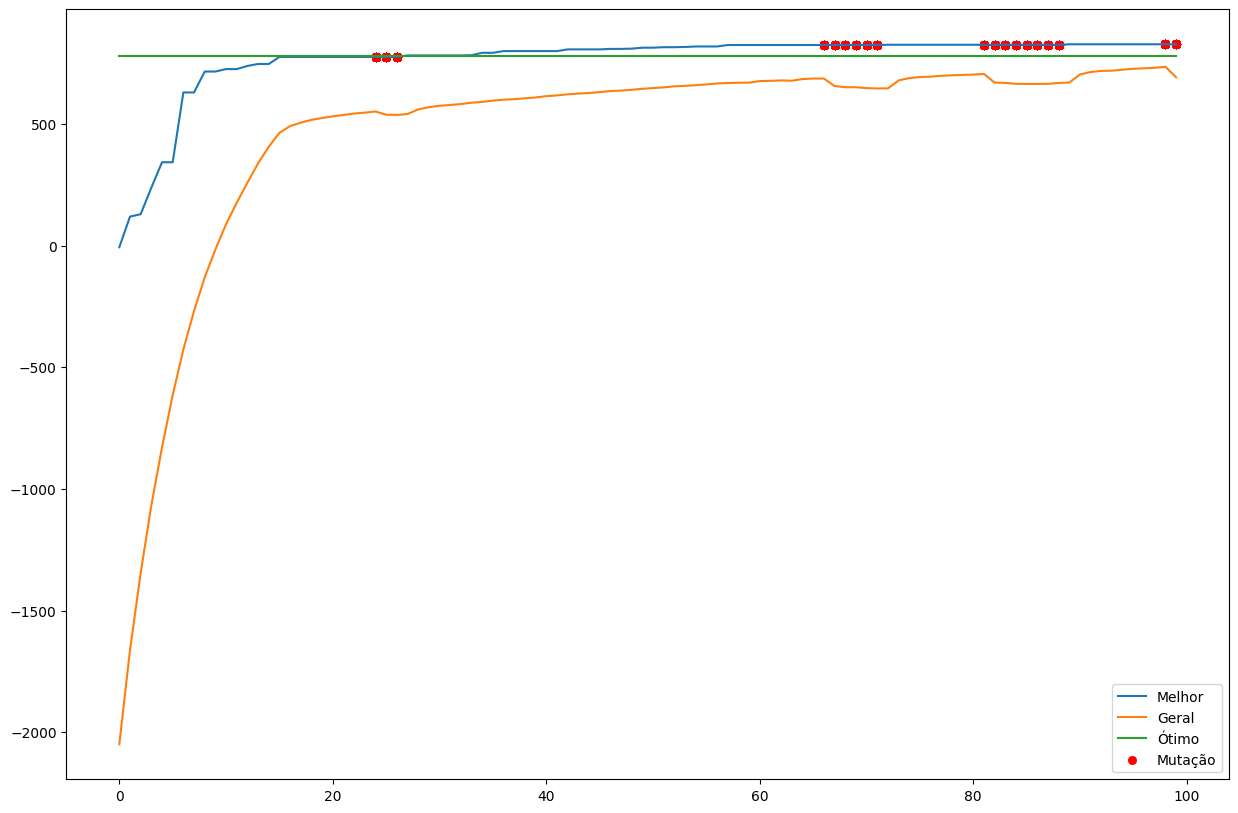

In [103]:
#Plotando comparação entre o melhor, ótimo e geral
plt.figure(figsize=(15,10))
plt.plot(fitness_melhores, label="Melhor")
plt.plot(fitness_gerais, label="Geral")
plt.plot([fitness_otimo]*num_geracoes, label="Ótimo")
plt.scatter(momentos_mutacao,[fitness_melhores[i] for i in momentos_mutacao], color='red', label="Mutação", linewidths=0.5)
plt.legend()
plt.show()